In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#Loading the Dataset
import pandas as pd

url = "https://raw.githubusercontent.com/agnes0408/Bank-Marketing-Project/main/bank.csv"
df = pd.read_csv(url)
df.head()


df.head()
df.shape
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()
df.describe(include='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   int64  
 1   job        4521 non-null   object 
 2   marital    4521 non-null   object 
 3   education  4521 non-null   object 
 4   default    4521 non-null   object 
 5   balance    4495 non-null   float64
 6   housing    4521 non-null   object 
 7   loan       4521 non-null   object 
 8   contact    4521 non-null   object 
 9   day        4521 non-null   int64  
 10  month      4521 non-null   object 
 11  duration   4521 non-null   int64  
 12  campaign   4442 non-null   float64
 13  pdays      4521 non-null   int64  
 14  previous   4521 non-null   int64  
 15  poutcome   4521 non-null   object 
 16  y          4521 non-null   object 
dtypes: float64(2), int64(5), object(10)
memory usage: 600.6+ KB


,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


##Stage 2 – Data Cleaning and Pre-processing

In [2]:
## convert the columns in proper format
df.columns = df.columns.str.title()
df.columns

Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance', 'Housing',
       'Loan', 'Contact', 'Day', 'Month', 'Duration', 'Campaign', 'Pdays',
       'Previous', 'Poutcome', 'Y'],
      dtype='object')

In [3]:
## Rename Columns
df.rename(columns={'Marital':'Marital_Status',
                   'Pdays':'Day_Since_Last_Contact',
                    'Poutcome':'Previous_Followup',
                  'Y':'Subscription_Status'},inplace=True)
df.columns
df.head(3)

,Age,Job,Marital_Status,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Day_Since_Last_Contact,Previous,Previous_Followup,Subscription_Status
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1.0,-1,0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220,1.0,339,4,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185,1.0,330,1,failure,no


In [4]:
df.dtypes

,0
Age,int64
Job,object
Marital_Status,object
Education,object
Default,object
Balance,float64
Housing,object
Loan,object
Contact,object
Day,int64


In [5]:
# Define categorical columns
categorical_columns = [
    "Job", "Marital_Status", "Education", "Default", "Housing", "Loan",
    "Contact", "Month", "Previous_Followup", "Subscription_Status"
]

# Convert object columns to category
df[categorical_columns] = df[categorical_columns].astype("category")
df.dtypes

,0
Age,int64
Job,category
Marital_Status,category
Education,category
Default,category
Balance,float64
Housing,category
Loan,category
Contact,category
Day,int64


In [6]:
df.nunique()


,0
Age,67
Job,12
Marital_Status,3
Education,4
Default,2
Balance,2345
Housing,2
Loan,2
Contact,3
Day,31


In [7]:
df["Job"] . value_counts(normalize=True, ascending=True)
df.tail()

,Age,Job,Marital_Status,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Day_Since_Last_Contact,Previous,Previous_Followup,Subscription_Status
4516,33,services,married,secondary,no,-333.0,yes,no,cellular,30,jul,329,5.0,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313.0,yes,yes,unknown,9,may,153,1.0,-1,0,unknown,no
4518,57,technician,married,secondary,no,295.0,no,no,cellular,19,aug,151,11.0,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137.0,no,no,cellular,6,feb,129,4.0,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136.0,yes,yes,cellular,3,apr,345,2.0,249,7,other,no


In [8]:
df.isnull().sum()/len(df)*100


,0
Age,0.000000
Job,0.000000
Marital_Status,0.000000
Education,0.000000
Default,0.000000
Balance,0.575094
Housing,0.000000
Loan,0.000000
Contact,0.000000
Day,0.000000


In [9]:
#labeling age into category
df['Age_Category'] = pd.cut( df['Age'], bins=[0, 13, 21, 35, 45, 60, 100], labels=['Child','Teenage','Adult','Mid-Age','Senior','Elder'] )
df.head(10)

,Age,Job,Marital_Status,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Day_Since_Last_Contact,Previous,Previous_Followup,Subscription_Status,Age_Category
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1.0,-1,0,unknown,no,Adult
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220,1.0,339,4,failure,no,Adult
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185,1.0,330,1,failure,no,Adult
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199,NaN,-1,0,unknown,no,Adult
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226,NaN,-1,0,unknown,no,Senior
5,35,management,single,tertiary,no,747.0,no,no,cellular,23,feb,141,NaN,176,3,failure,no,Adult
6,36,self-employed,married,tertiary,no,307.0,yes,no,cellular,14,may,341,NaN,330,2,other,no,Mid-Age
7,39,technician,married,secondary,no,147.0,yes,no,cellular,6,may,151,NaN,-1,0,unknown,no,Mid-Age
8,41,entrepreneur,married,tertiary,no,221.0,yes,no,unknown,14,may,57,NaN,-1,0,unknown,no,Mid-Age
9,43,services,married,primary,no,-88.0,yes,yes,cellular,17,apr,313,NaN,147,2,failure,no,Mid-Age


In [10]:
#labeling balance into category
df['Balance_Category'] = pd.cut(
    df['Balance'],
    bins=[-100000, 0, 1000, 5000, 10000, 100000000],
    labels=['Negative','Low','Medium','High','Very High']
)
df.head()

,Age,Job,Marital_Status,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Day_Since_Last_Contact,Previous,Previous_Followup,Subscription_Status,Age_Category,Balance_Category
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1.0,-1,0,unknown,no,Adult,Medium
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220,1.0,339,4,failure,no,Adult,Medium
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185,1.0,330,1,failure,no,Adult,Medium
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199,NaN,-1,0,unknown,no,Adult,Medium
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226,NaN,-1,0,unknown,no,Senior,Negative


In [11]:
#imputing the average value of balance into null values in balance column
df['Balance'] = df['Balance'].fillna(df['Balance'].mean())


In [12]:
df['Balance'].isna().sum()


np.int64(0)

In [13]:
##imputing the average value of balance into null values in balance column
df['Campaign'].unique()


array([ 1., nan,  2.,  4.,  3.,  5.,  6., 10.,  9.,  7., 12., 14., 13.,
       24., 11.,  8., 29., 32., 16., 22., 18., 15., 30., 25., 21., 17.,
       19., 23., 20., 50., 28., 31., 44.])

In [14]:
df['Campaign'] = df['Campaign'].fillna(df['Campaign'].mode()[0])
df.head()

,Age,Job,Marital_Status,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Day_Since_Last_Contact,Previous,Previous_Followup,Subscription_Status,Age_Category,Balance_Category
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1.0,-1,0,unknown,no,Adult,Medium
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220,1.0,339,4,failure,no,Adult,Medium
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185,1.0,330,1,failure,no,Adult,Medium
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199,1.0,-1,0,unknown,no,Adult,Medium
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226,1.0,-1,0,unknown,no,Senior,Negative


In [15]:
df['Campaign'].isnull().sum()


np.int64(0)

In [16]:
df.columns
df.head(3)


,Age,Job,Marital_Status,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Day_Since_Last_Contact,Previous,Previous_Followup,Subscription_Status,Age_Category,Balance_Category
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1.0,-1,0,unknown,no,Adult,Medium
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220,1.0,339,4,failure,no,Adult,Medium
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185,1.0,330,1,failure,no,Adult,Medium


After data cleaning, renaming, and feature engineering, the dataset now contains 19 columns, including two newly derived categorical features (Age_Category and Balance_Category) created to support deeper exploratory analysis.

##Stage 2 Observations

1. Column names were standardized and renamed for clarity.

2. Categorical variables were explicitly converted to category data types.

3. Missing values were handled using appropriate statistical imputation methods.

4. New derived columns such as age category and balance category were created to enhance analytical depth.


##STAGE 3 – EDA AND VISUALIZATIONS

###Chart1- Subscription Status Distribution (Countplot)

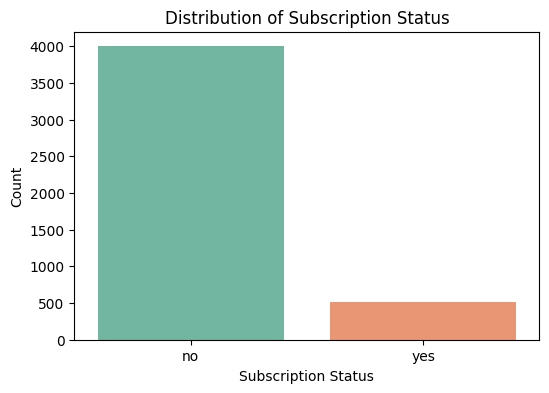

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='Subscription_Status', data=df, palette='Set2')
plt.title('Distribution of Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Count')
plt.show()


**Interpretation of the above chart**

This chart shows the count of customers who subscribed and did not subscribe.

Feature used: Subscription_Status

It indicates that a majority of customers did not subscribe, highlighting the challenge in campaign conversion.

###Chart 2 – Age Distribution (Histogram)

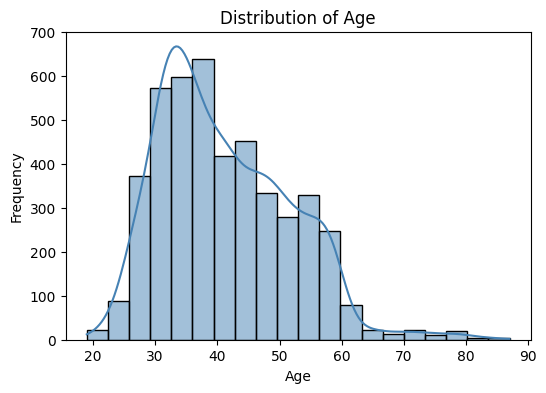

In [18]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=20, kde=True, color='steelblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

###Interpretation of the above chart

This chart represents the age distribution of customers.

Feature used: Age

It shows most customers fall between adult and mid-age groups, which forms the bank’s primary customer base.

###Chart 3 – Balance Distribution by Subscription (Boxplot)

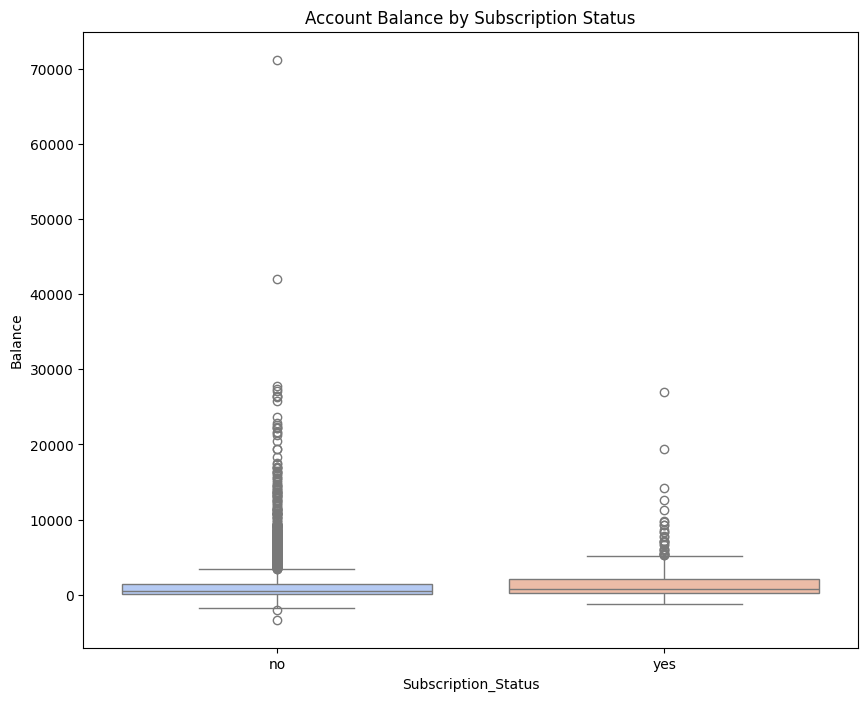

In [19]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Subscription_Status', y='Balance', data=df, palette='coolwarm')
plt.title('Account Balance by Subscription Status')
plt.show()

###Interpretation of the above chart

This boxplot compares account balance across subscription outcomes.

Features used: Balance, Subscription_Status

Customers who subscribed generally have higher median balances, suggesting balance impacts subscription decisions.

###Chart 4 – Job vs Subscription (Barplot)

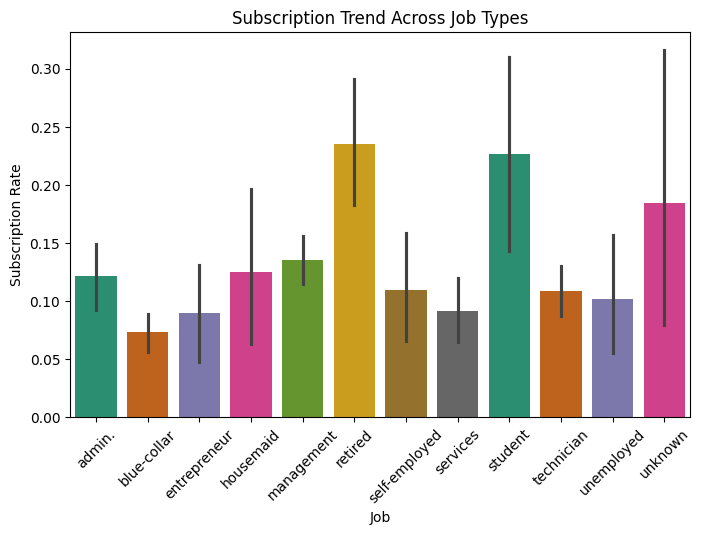

In [20]:
plt.figure (figsize = (8,5))
sns.barplot (x = "Job", y = df["Subscription_Status"].cat.codes, data = df ,palette="Dark2" )
plt.title('Subscription Trend Across Job Types')
plt.xticks(rotation=45)
plt.ylabel('Subscription Rate')
plt.show()

###Interpretation of the above chart

This chart compares subscription trends across different job categories.

Features used: Job, Subscription_Status

Certain job roles show higher subscription likelihood, indicating occupation influences financial behavior.

###Chart 5 – Duration vs Balance (Scatterplot

<function matplotlib.pyplot.show(close=None, block=None)>

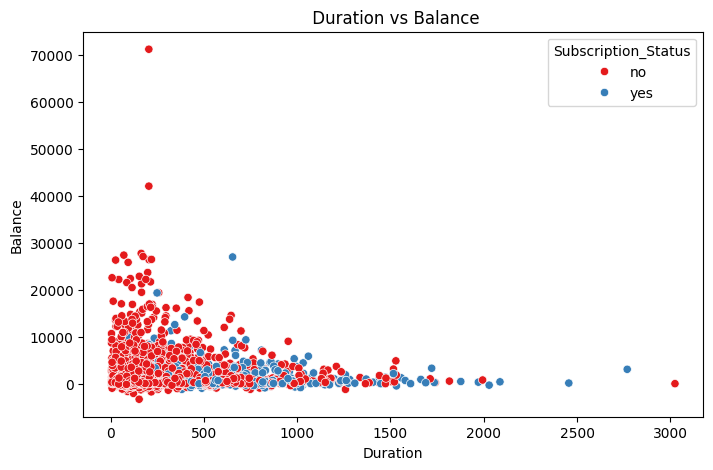

In [21]:
plt.figure (figsize=(8,5))
sns.scatterplot(data = df, x ="Duration" , y="Balance", hue ='Subscription_Status',palette ="Set1")
plt.title(" Duration vs Balance")
plt.show

###Interpretation of the above chart

This scatterplot shows the relationship between call duration and balance.

Features used: Duration, Balance, Subscription_Status

Longer calls are associated with higher subscription rates, especially among higher-balance customers.

###Chart 6 – Correlation Heatmap (Numeric Variables)

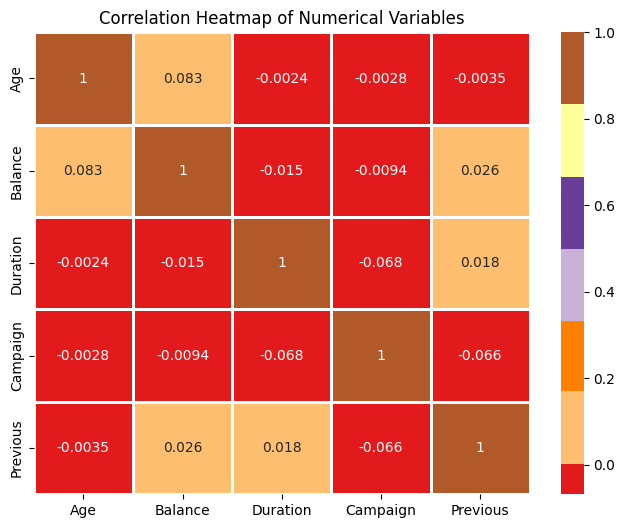

In [22]:
plt.figure(figsize=(8,6))
corr = df[['Age','Balance','Duration','Campaign','Previous']].corr()

sns.heatmap(corr, annot=True, cmap='Paired', linewidths=0.9, center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


###Interpretation of the above chart

This heatmap displays correlations among numerical features.

Features used: Age, Balance, Duration, Campaign, Previous

Duration shows relatively stronger relationships, indicating its importance in campaign outcomes.

###Chart 7 – Pairplot (Multiple Numeric Variables)

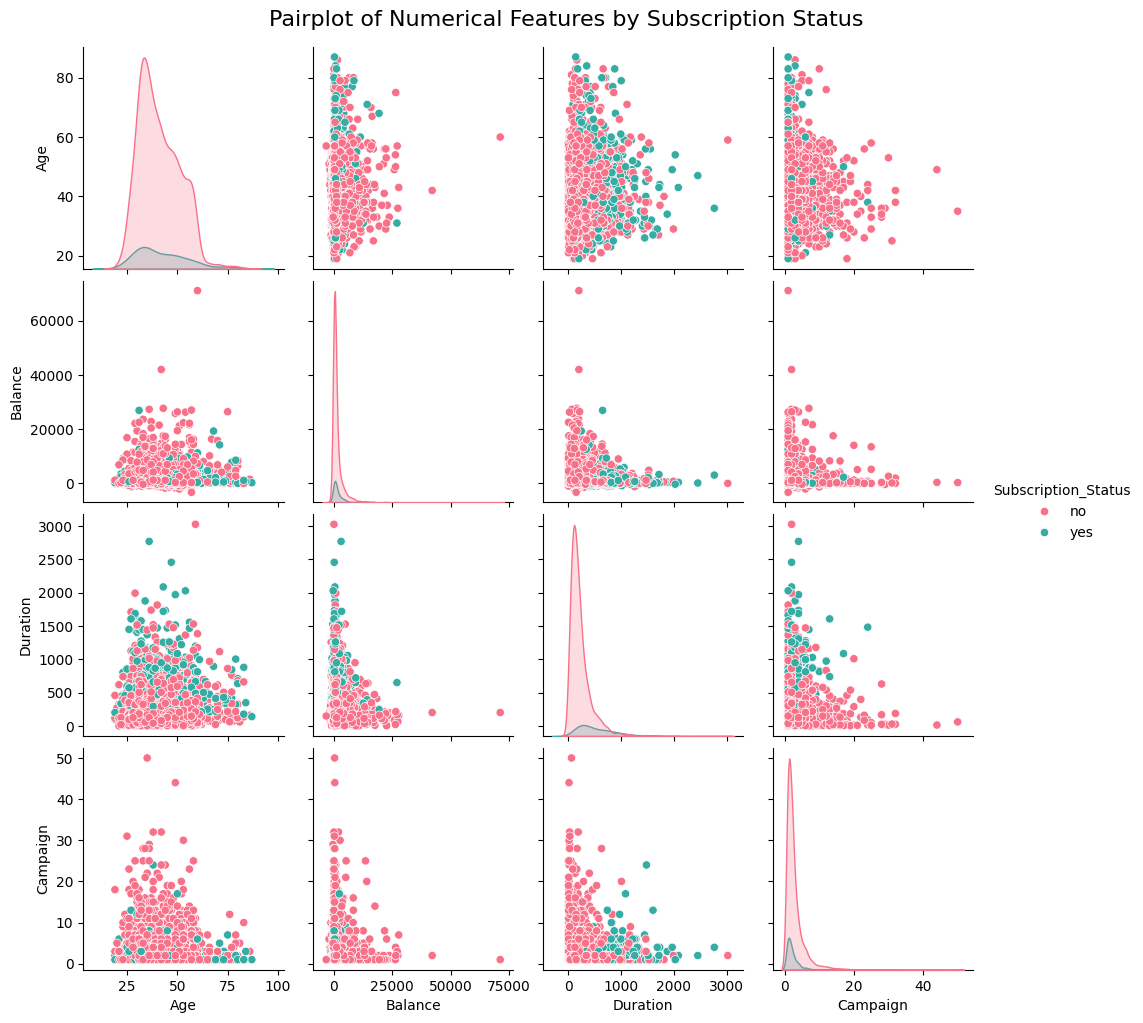

In [23]:
sns.pairplot(
    df,
    vars=['Age','Balance','Duration','Campaign'],
    hue='Subscription_Status',
    palette='husl'
)
plt.suptitle("Pairplot of Numerical Features by Subscription Status", y=1.02, fontsize=16)
plt.show()


###Interpretation of the above chart

This plot shows interactions between multiple numeric features.

Features used: Age, Balance, Duration, Campaign, Subscription_Status

It reveals combinations of features linked with higher subscription likelihood.

###Chart 8 – Age Category vs Balance vs Subscription (Swarm Plot)

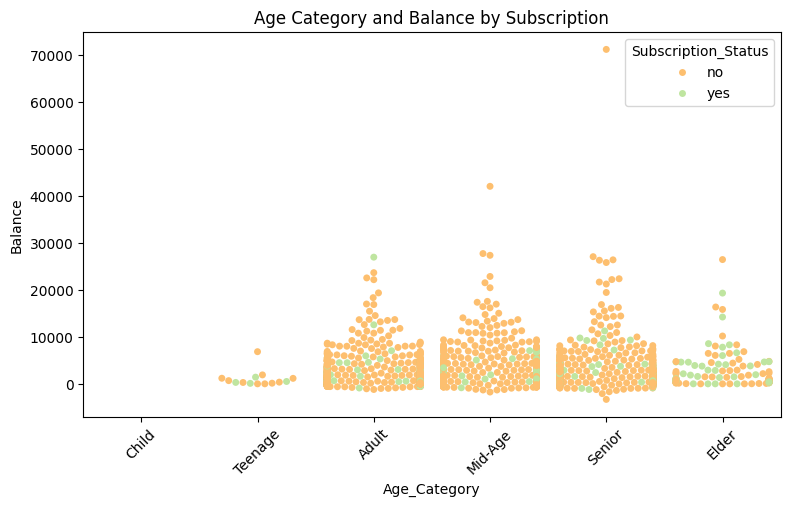

In [24]:
plt.figure(figsize=(9,5))
sns.swarmplot(
    x='Age_Category',
    y='Balance',
    hue='Subscription_Status',
    data=df,
     palette='Spectral'

)
plt.xticks(rotation=45)
plt.title('Age Category and Balance by Subscription')
plt.show()


###Interpretation of the above chart

This chart analyzes age category and balance together with subscription status.

Features used: Age_Category, Balance, Subscription_Status

Mid-age and senior customers with higher balances show stronger subscription patterns.

###Chart 9 – Campaign Count by Month and Subscription (Grouped Analysis)

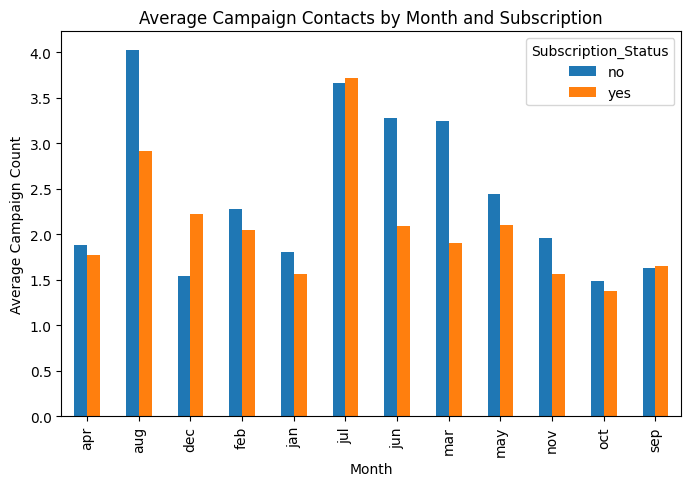

In [25]:
pivot_table = pd.pivot_table(
    df,
    values='Campaign',
    index='Month',
    columns='Subscription_Status',
    aggfunc='mean'
)

pivot_table.plot(kind='bar', figsize=(8,5))
plt.title('Average Campaign Contacts by Month and Subscription')
plt.ylabel('Average Campaign Count')
plt.show()


###Interpretation of the above chart

This grouped analysis compares campaign intensity across months.

Features used: Month, Campaign, Subscription_Status

Excessive campaign contacts do not necessarily improve subscription rates.

###Chart 10 – Education vs Housing Loan vs Subscription (Countplot)

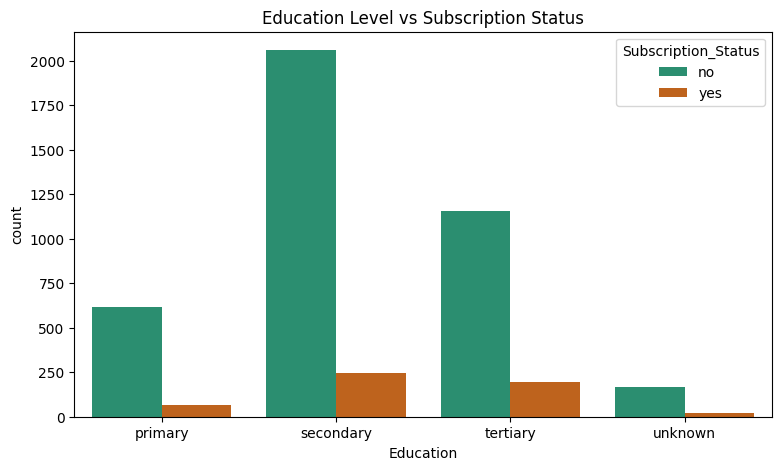

In [26]:
plt.figure(figsize=(9,5))
sns.countplot(
    x='Education',
    hue='Subscription_Status',
    data=df,
    palette='Dark2'
)
plt.title('Education Level vs Subscription Status')
plt.show()


###Interpretation of the above chart

This chart compares subscription outcomes across education levels.

Features used: Education, Subscription_Status

Higher education levels show relatively better subscription engagement.

##STAGE 3 BUSINESS STORY (Final Summary)

The EDA reveals that customer subscription is influenced by demographic factors, financial capacity, and campaign interaction quality. Call duration, balance level, and age category play a significant role, while excessive campaign contacts show diminishing returns. These insights help banks design more targeted and effective marketing strategies.

In [27]:
df.to_csv("final_data.csv", index=False)


#Stage 4 – Documentation, Insights and Presentation


Link for the powerbi Dashboard pdf- https://drive.google.com/file/d/1JZcpV06viy5QwHBb-roLLqRhzcVNI0Rh/view?usp=sharing


###Future Enhancements

1. Use a larger or more recent dataset to capture evolving customer behavior

2. Automate data refresh and analysis using Power BI Service or scripts

3. Add advanced interactive visuals (drill-throughs, dynamic tooltips)

4. Extend analysis into predictive modeling to forecast subscription likelihood

###Conclusion

From this analysis, we identified meaningful relationships between customer demographics, financial behavior, and marketing effectiveness.
The Power BI dashboard provides a strong analytical foundation for data-driven marketing decisions, enabling the bank to improve conversion rates and optimize future campaigns.

Based on the analysis, the following actions are recommended:

Focus campaigns on Adult & Middle-aged customers
These groups show the highest engagement and conversion.

Optimize campaign timing
Increase outreach during July and August, when customer responsiveness is higher.

Improve campaign quality, not quantity
Longer, meaningful conversations drive better subscriptions than repeated contacts.

Do not ignore low-balance customers
They form the majority of subscribers and represent future growth potential.

Use job-based targeting
Tailor offers for management and professional roles for higher effectiveness.